The goal of this work is to figure out analysis of machine learning and AI by industry.

## Import Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

## Load the survey respondents dataset

In [2]:
raw_df = pd.read_csv('kaggle_survey_2022_responses.csv', low_memory=False)
raw_df.head(2)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning,"On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree),On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other,What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - University courses,"What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Online courses (Coursera, EdX, etc)","What products or platforms did you find to be most helpful wh

In [12]:
# currently not students - No to Q5
# currently employed - Q23
# in an industry - Q24
df = raw_df[(raw_df['Q5']=='No') & (raw_df['Q24'].notnull()) & (raw_df['Q23']!='Currently not employed') & (raw_df['Q29'].notnull())]
print('Original dataset: ', len(raw_df))
print('Dataset: ', len(df))
print('% of original data: ',round(len(df)/len(raw_df),3)*100)

Original dataset:  23998
Dataset:  8136
% of original data:  33.900000000000006


## Subset by industry

In [13]:
df_finance = df[df['Q24']=='Accounting/Finance']
df_technology = df[df['Q24']=='Computers/Technology']
df_internet = df[df['Q24']=='Online Service/Internet-based Services']

In [14]:
print('Original (raw) dataset: ', len(raw_df))
print('Refined Dataset: ', len(df))
print('% of original data: ',round(len(df)/len(raw_df),2)*100)
print('-------------------------------------')

print('Finance dataset: ', len(df_finance))
print('% of original data: ', round(len(df_finance)/len(df),2)*100)
print('-------------------------------------')

print('Technology dataset: ', len(df_technology))
print('% of original data: ', round(len(df_technology)/len(df),2)*100)
print('-------------------------------------')

print('Internet dataset: ', len(df_internet))
print('% of original data: ', round(len(df_internet)/len(df),2)*100)
print('-------------------------------------')

Original (raw) dataset:  23998
Refined Dataset:  8136
% of original data:  34.0
-------------------------------------
Finance dataset:  729
% of original data:  9.0
-------------------------------------
Technology dataset:  2056
% of original data:  25.0
-------------------------------------
Internet dataset:  417
% of original data:  5.0
-------------------------------------


## Helper Functions

In [18]:
# convert salary 
df_finance_w = df_finance[['Q2', 'Q4','Q11','Q12_1', 'Q12_2', 'Q12_3', 'Q12_4','Q12_5','Q12_6',
                    'Q12_7','Q12_8', 'Q12_9','Q29']]
df_finance_w.head()

,Q2,Q4,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q29
18,30-34,United States of America,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,"150,000-199,999"
33,30-34,Other,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"125,000-149,999"
98,35-39,India,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,"20,000-24,999"
137,45-49,India,10-20 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,"30,000-39,999"
247,30-34,Ethiopia,1-3 years,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,"3,000-3,999"


In [48]:
def salary_str_to_num(df):
    new = df["Q29"].str.split("-", n = 2, expand = True)
    df['Min_Salary_Range'] = new[0]
    df['Min_Salary_Range'] = df['Min_Salary_Range'].str.replace(',','')
    df['Min_Salary_Range'] = df['Min_Salary_Range'].str.replace('$','')
    df['Min_Salary_Range'] = df['Min_Salary_Range'].str.replace('>','')
    df['Min_Salary_Range'] = pd.to_numeric(df['Min_Salary_Range'])
    df['Max_Salary_Range'] = new[1]
    df['Max_Salary_Range'] = df['Max_Salary_Range'].str.replace(',','')
    df['Max_Salary_Range'] = df['Max_Salary_Range'].str.replace('$','')
    df['Max_Salary_Range'] = df['Max_Salary_Range'].str.replace('>','')
    df['Max_Salary_Range'] = pd.to_numeric(df['Max_Salary_Range'])
    df['Avg_Salary_Range']  = (df['Max_Salary_Range']+df['Min_Salary_Range'])/2
    return df[['Q2', 'Q4', 'Q11', 'Q12_1', 'Q29','Min_Salary_Range','Max_Salary_Range','Avg_Salary_Range']]
    

In [50]:
df_finance_edit = salary_str_to_num(df_finance_w)

In [52]:
df_finance_edit.head()
df_finance_edit[df_finance_edit['Q4']=='United States of America']

,Q2,Q4,Q11,Q12_1,Q29,Min_Salary_Range,Max_Salary_Range,Avg_Salary_Range
18,30-34,United States of America,5-10 years,Python,"150,000-199,999",150000,199999.0,174999.5
374,30-34,United States of America,5-10 years,Python,"125,000-149,999",125000,149999.0,137499.5
469,22-24,United States of America,1-3 years,NaN,"80,000-89,999",80000,89999.0,84999.5
693,40-44,United States of America,10-20 years,Python,"150,000-199,999",150000,199999.0,174999.5
1084,25-29,United States of America,< 1 years,NaN,"40,000-49,999",40000,49999.0,44999.5
1189,25-29,United States of America,3-5 years,Python,"100,000-124,999",100000,124999.0,112499.5
1334,30-34,United States of America,5-10 years,Python,"100,000-124,999",100000,124999.0,112499.5
1502,45-49,United States of America,< 1 years,NaN,"50,000-59,999",50000,59999.0,54999.5
1526,50-54,United States of America,10-20 years,Python,"150,000-199,999",150000,199999.0,174999.5
1596,30-34,United States of America,3-5 years,Python,"90,000-99,999",90000,99999.0,94999.5


In [31]:
df_programming = df[['Q2', 'Q4','Q11','Q12_1', 'Q12_2', 'Q12_3', 'Q12_4','Q12_5','Q12_6',
                    'Q12_7','Q12_8', 'Q12_9','Q29']]

In [32]:
df['Q29'].value_counts().sort_values().head()

>$1,000,000          23
$500,000-999,999     48
300,000-499,999      76
250,000-299,999      78
200,000-249,999     155
Name: Q29, dtype: int64

In [33]:
df_programming.head()

,Q2,Q4,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q29
4,55-59,France,10-20 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,"25,000-29,999"
8,30-34,Germany,10-20 years,Python,NaN,SQL,C,NaN,NaN,Java,Javascript,NaN,"100,000-124,999"
9,70+,Australia,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"100,000-124,999"
11,55-59,South Korea,1-3 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,40-44,United States of America,10-20 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,"200,000-249,999"


In [36]:
goal = df_programming[(df_programming['Q4']=='United States of America') & (df_programming['Q29']).notnull()]

In [38]:
goal[goal['Q11']=='5-10 years']

,Q2,Q4,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q29
18,30-34,United States of America,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,Bash,"150,000-199,999"
164,50-54,United States of America,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,"100,000-124,999"
335,45-49,United States of America,5-10 years,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"100,000-124,999"
374,30-34,United States of America,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,"125,000-149,999"
462,55-59,United States of America,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,500-9,999"
538,30-34,United States of America,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,"125,000-149,999"
620,30-34,United States of America,5-10 years,NaN,NaN,SQL,NaN,C#,NaN,NaN,NaN,NaN,"100,000-124,999"
769,35-39,United States of America,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,"200,000-249,999"
792,25-29,United States of America,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,Bash,"100,000-124,999"
798,40-44,United States of America,5-10 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"150,000-199,999"


In [41]:
df['Q24'].value_counts()

Computers/Technology                      2321
Academics/Education                       1447
Accounting/Finance                         802
Other                                      750
Manufacturing/Fabrication                  561
Medical/Pharmaceutical                     509
Government/Public Service                  500
Online Service/Internet-based Services     461
Retail/Sales                               398
Energy/Mining                              320
Insurance/Risk Assessment                  256
Marketing/CRM                              246
Non-profit/Service                         194
Broadcasting/Communications                179
Shipping/Transportation                    150
Name: Q24, dtype: int64

In [48]:
df_finance['Q29'].value_counts().sort_values()

>$1,000,000          3
250,000-299,999      7
$500,000-999,999    10
4,000-4,999         13
3,000-3,999         15
300,000-499,999     16
200,000-249,999     17
90,000-99,999       18
15,000-19,999       18
60,000-69,999       20
80,000-89,999       20
2,000-2,999         25
25,000-29,999       26
150,000-199,999     29
70,000-79,999       31
7,500-9,999         31
5,000-7,499         34
1,000-1,999         34
50,000-59,999       35
20,000-24,999       35
125,000-149,999     36
40,000-49,999       36
100,000-124,999     39
30,000-39,999       40
10,000-14,999       60
$0-999              81
Name: Q29, dtype: int64

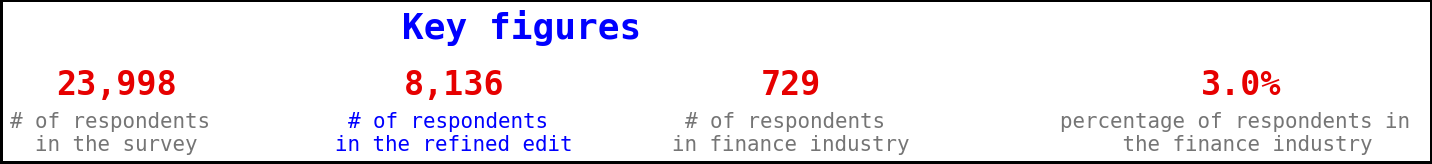

In [62]:
plt.rcParams.update(plt.rcParamsDefault)

fig = plt.figure(figsize=(5,2),facecolor='white')

ax = fig.add_subplot(1,1,1)
font = 'monospace'
ax.text(0.9, 0.8, "Key figures",color='blue',fontsize=26, fontweight='bold', fontfamily=font, ha='center')



ax.text(0, 0.4, "{:,d}".format(raw_df.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0, 0.001, "# of respondents \nin the survey",color='#757575',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(.75, 0.4, "{:,d}".format(df.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(.75, 0.001, "# of respondents \nin the refined edit",color='blue',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(1.5, 0.4, "{:,d}".format(df_finance.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.5, 0.001, "# of respondents \nin finance industry",color='#757575',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(2.5, 0.4, "{}".format(round((df_finance.shape[0]/raw_df.shape[0] )*100, 1))+"%", color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(2.5, 0.001, "percentage of respondents in \n the finance industry",color='#757575',fontsize=15, fontweight='light', fontfamily=font, ha='center')

#ax.text(3.5, 0.4, "{}".format(round(str(df_finance['Q29'].mean()) ,1)), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
#ax.text(3.5, 0.001, "avg salary in \n the finance industry",color='#757575',fontsize=15, fontweight='light', fontfamily=font, ha='center')


ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)

fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig.patch.set_linewidth(3)
fig.patch.set_edgecolor('black')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
    
plt.show()

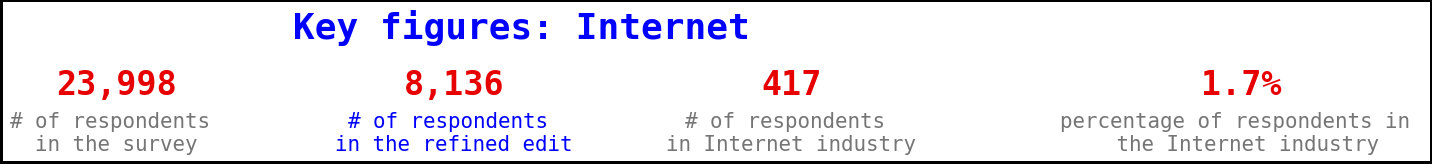

In [59]:
fig = plt.figure(figsize=(5,2),facecolor='white')

ax = fig.add_subplot(1,1,1)
font = 'monospace'
ax.text(0.9, 0.8, "Key figures: Internet",color='blue',fontsize=26, fontweight='bold', fontfamily=font, ha='center')



ax.text(0, 0.4, "{:,d}".format(raw_df.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0, 0.001, "# of respondents \nin the survey",color='#757575',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(.75, 0.4, "{:,d}".format(df.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(.75, 0.001, "# of respondents \nin the refined edit",color='blue',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(1.5, 0.4, "{:,d}".format(df_internet.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.5, 0.001, "# of respondents \nin Internet industry",color='#757575',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(2.5, 0.4, "{}".format(round((df_internet.shape[0]/raw_df.shape[0] )*100, 1))+"%", color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(2.5, 0.001, "percentage of respondents in \n the Internet industry",color='#757575',fontsize=15, fontweight='light', fontfamily=font, ha='center')

#ax.text(3.5, 0.4, "{}".format(round(str(df_finance['Q29'].mean()) ,1)), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
#ax.text(3.5, 0.001, "avg salary in \n the finance industry",color='#757575',fontsize=15, fontweight='light', fontfamily=font, ha='center')


ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)

fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig.patch.set_linewidth(3)
fig.patch.set_edgecolor('black')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
    
plt.show()

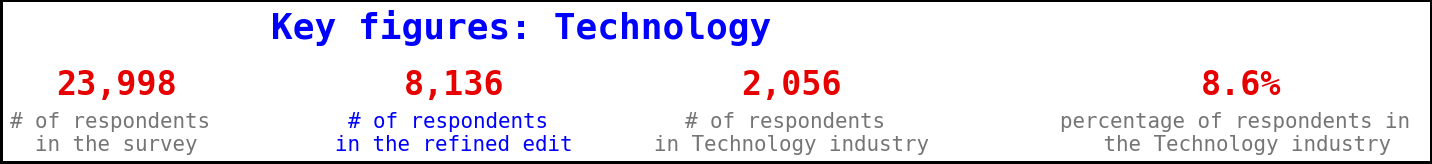

In [61]:
fig = plt.figure(figsize=(5,2),facecolor='white')

ax = fig.add_subplot(1,1,1)
font = 'monospace'
ax.text(0.9, 0.8, "Key figures: Technology",color='blue',fontsize=26, fontweight='bold', fontfamily=font, ha='center')



ax.text(0, 0.4, "{:,d}".format(raw_df.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0, 0.001, "# of respondents \nin the survey",color='#757575',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(.75, 0.4, "{:,d}".format(df.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(.75, 0.001, "# of respondents \nin the refined edit",color='blue',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(1.5, 0.4, "{:,d}".format(df_technology.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.5, 0.001, "# of respondents \nin Technology industry",color='#757575',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(2.5, 0.4, "{}".format(round((df_technology.shape[0]/raw_df.shape[0] )*100, 1))+"%", color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(2.5, 0.001, "percentage of respondents in \n the Technology industry",color='#757575',fontsize=15, fontweight='light', fontfamily=font, ha='center')

#ax.text(3.5, 0.4, "{}".format(round(str(df_finance['Q29'].mean()) ,1)), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
#ax.text(3.5, 0.001, "avg salary in \n the finance industry",color='#757575',fontsize=15, fontweight='light', fontfamily=font, ha='center')


ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)

fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig.patch.set_linewidth(3)
fig.patch.set_edgecolor('black')
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
    
plt.show()